In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the Data

In [2]:
# Loading the preprocessed myopia dataset
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SPHEQ'}>,
        <AxesSubplot:title={'center':'AL'}>,
        <AxesSubplot:title={'center':'ACD'}>],
       [<AxesSubplot:title={'center':'LT'}>,
        <AxesSubplot:title={'center':'VCD'}>,
        <AxesSubplot:title={'center':'SPORTHR'}>,
        <AxesSubplot:title={'center':'READHR'}>],
       [<AxesSubplot:title={'center':'COMPHR'}>,
        <AxesSubplot:title={'center':'STUDYHR'}>,
        <AxesSubplot:title={'center':'TVHR'}>,
        <AxesSubplot:title={'center':'DIOPTERHR'}>],
       [<AxesSubplot:title={'center':'MOMMY'}>,
        <AxesSubplot:title={'center':'DADMY'}>,
        <AxesSubplot:title={'center':'MYOPIC'}>, <AxesSubplot:>]],
      dtype=object)

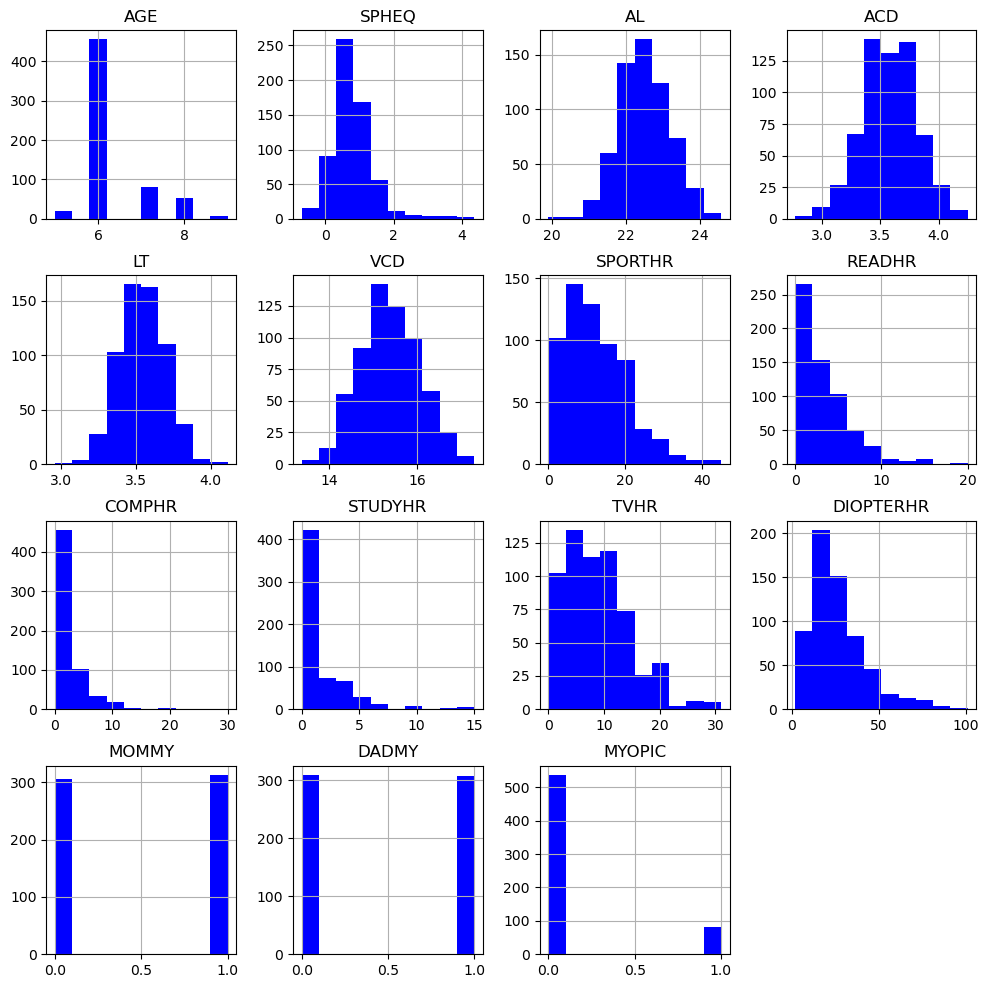

In [39]:
#Histogram
df_myopia.hist(figsize=(12,12),color='b')

In [3]:
#Drop the "MYOPIC" column
df_myopia_new=df_myopia.drop("MYOPIC", axis=1)
df_myopia_new.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# check for null values
df_myopia_new.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [5]:
df_myopia_new.var()

AGE            0.508298
SPHEQ          0.391774
AL             0.462592
ACD            0.053081
LT             0.023876
VCD            0.441139
SPORTHR       63.493743
READHR         9.413794
COMPHR         9.342242
STUDYHR        4.911575
TVHR          32.707201
DIOPTERHR    257.015890
MOMMY          0.250363
DADMY          0.250403
dtype: float64

In [6]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df_myopia_new)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


# Apply Dimensionality Reduction

In [7]:
#PCA(n_components=0.99)
# preserve 90% of the explained variance in dimensionality reduction.

# Initialize PCA model
pca = PCA(n_components=0.99,)

# Get the principal components
myopia_pca = pca.fit_transform(myopia_scaled)

In [21]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
#To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
tsne = TSNE(n_components=3,verbose=1, perplexity=50, n_iter=1000, learning_rate=200)

# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)


C:\Users\elama\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.002s...
[t-SNE] Computed neighbors for 618 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.491148
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.232689
[t-SNE] KL divergence after 1000 iterations: 1.694345


In [22]:
#To check the reduction in dimensionality
tsne_features.shape

(618, 3)

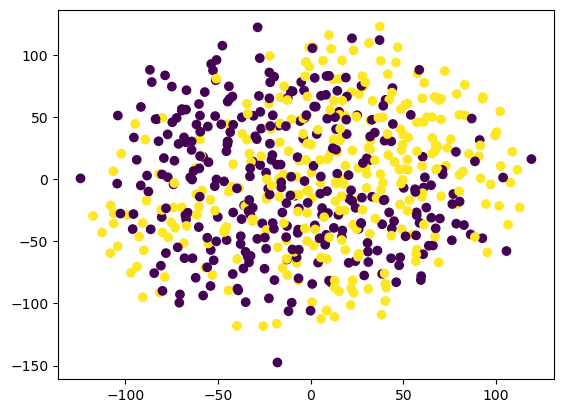

In [23]:
# scatter plot the data
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=df_myopia_new["DADMY"])

In [35]:
# visualize
df_tsne = pd.DataFrame(tsne_features, columns=['comp1', 'comp2','comp3'])
df_tsne.head()

,comp1,comp2,comp3
0,12.838516,-110.894440,27.091684
1,-61.848106,9.343248,-75.830528
2,-26.736855,40.740593,20.286369
3,72.898369,10.832866,48.837070
4,-37.794971,-52.185669,83.441055


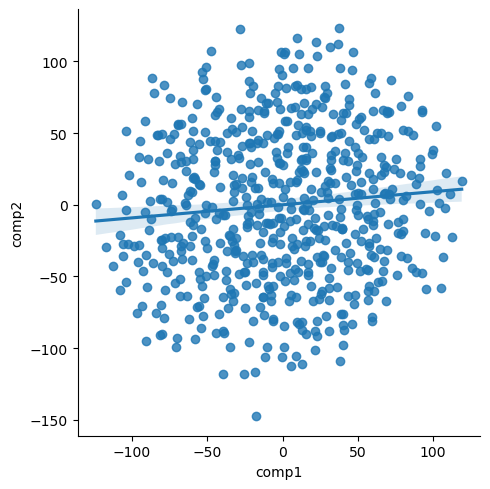

In [38]:
sns.lmplot(data=df_tsne, x="comp1", y="comp2")